# Code for Language Analysis of toxic comments in game review forums

#### Import nltk, matplotlib, pandas, and numpy:

In [10]:
import nltk

# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

# set matplotlib environment and import some basics
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd


#### Sets dimensions of pandas table:

In [11]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 100 # set to -1 to see entire text

#### Loads documents (false/true determines data length):

In [12]:
if True:
    # comment filename
    commentfile = 'toxicity_annotated_comments_unanimous.tsv'
    # rating filename
    ratingfile = 'toxicity_annotations_unanimous.tsv'

# full data set
    # comment filename
    commentfile = 'toxicity_annotated_comments.tsv'
    # rating filename
    ratingfile = 'toxicity_annotations.tsv'

#### Read Documents and store Pandas "Dataframe" type to variable:

In [13]:
# load annotated comments
commentdata = pd.read_table(commentfile)
ratingdata = pd.read_table(ratingfile)

# remove weird tab/newline TOKEN text
commentdata['comment'] = commentdata['comment'].str.replace('NEWLINE_TOKEN',' ')
commentdata['comment'] = commentdata['comment'].str.replace('TAB_TOKEN',' ')

print(type(commentdata))

<class 'pandas.core.frame.DataFrame'>


#### Check shape of DataFrame:

In [14]:
# show shape of each data set
print("commentdata.shape = ",commentdata.shape)
print("ratingdata.shape = ",ratingdata.shape)

commentdata.shape =  (159686, 7)
ratingdata.shape =  (1598289, 4)


#### Count Punctuation Function:

In [6]:
from string import punctuation
from collections import Counter

def punc_count(string_value):
    count = 0
    for c in string_value:
        if c in punctuation:
            count+= 1
    return count

#### Add and manipulate data columns:

In [18]:
# group all scores by comment ID for each text sample, add mean and median score columns to comment data 
commentdata["mean_score"] = pd.Series(ratingdata.groupby("rev_id",as_index=False).mean()["toxicity_score"])
commentdata["median_score"] = pd.Series(ratingdata.groupby("rev_id",as_index=False).median()["toxicity_score"])

# Add columns for comment length and punctuation count
commentdata["com_len"] = pd.Series(commentdata["comment"].str.len())
commentdata["pun_len"] = pd.Series(commentdata["comment"].apply(punc_count))

# create catgorical variable toxicity: if median score < 0, toxicity=1, otherwise 0
commentdata["toxicity"] = (commentdata["median_score"] < 0).astype(int)

#### Print Table Template with example values:

In [19]:
print("commentdata.shape = ",commentdata.shape)
commentdata.head()

commentdata.shape =  (159686, 12)


,rev_id,comment,year,logged_in,ns,sample,split,mean_score,median_score,com_len,pun_len,toxicity
0,2232.0,This: :One can make an analogy in mathematical terms by envisioning the distribution of opinions...,2002,True,article,random,train,0.4,0.5,651,16,0
1,4216.0,"` :Clarification for you (and Zundark's right, i should have checked the Wikipedia bugs page f...",2002,True,user,random,train,0.5,0.0,611,29,0
2,8953.0,Elected or Electoral? JHK,2002,False,article,random,test,0.1,0.0,25,1,0
3,26547.0,`This is such a fun entry. Devotchka I once had a coworker from Korea and not only couldn't s...,2002,True,article,random,train,0.6,0.0,2976,204,0
4,28959.0,"Please relate the ozone hole to increases in cancer, and provide figures. Otherwise, this articl...",2002,True,article,random,test,0.2,0.0,197,5,0


#### Plot Comment Length to Toxicity

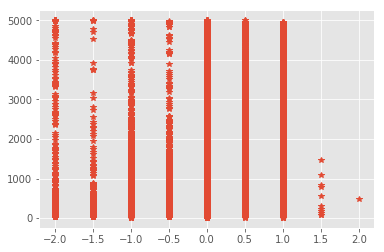

In [20]:
plt.plot(pd.Series(commentdata["median_score"]),pd.Series(commentdata["com_len"]),'*')
plt.show()

#### Plot Punctuation Count to Toxicity

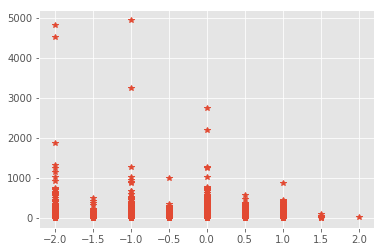

In [21]:
plt.plot(pd.Series(commentdata["median_score"]),pd.Series(commentdata["pun_len"]),'*')
plt.show()